# Lecture 12
In this example, we will build different classifiers (using **_k_-nearest neighbors**, **Naive Bayes**, and **support vector machines**) to classify iris flowers into three species (setosa, versicolor, or virginica) based on the length and width of the petals and sepals.

In [1]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Load dataset
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Explore dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Explore categorical variables
print(data.species.unique())

['setosa' 'versicolor' 'virginica']


In [5]:
# Partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],\
                                                    data['species'], test_size=0.25, random_state = 1)

In [6]:
# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

In [7]:
# CLASSIFIER: k-Nearest Neighbors
# Initialize k-nearest neighbors classifier
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Predict class labels using k-nearest neighbors classifier
y_pred = classifier.predict(x_test) 

In [9]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


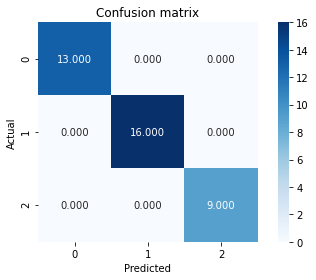

In [10]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [11]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

1.0
0.0
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [12]:
# CLASSIFIER: Naive Bayes
# Initialize Naive Bayes classifier
classifier = GaussianNB()  
classifier.fit(x_train, y_train)

GaussianNB()

In [13]:
# Predict class labels using Naive Bayes classifier
y_pred = classifier.predict(x_test)

In [14]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


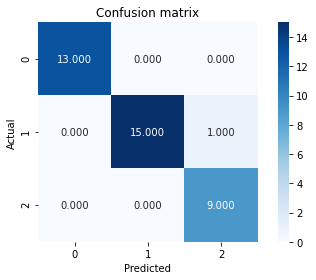

In [16]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [17]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.9736842105263158
0.02631578947368418
[1.  1.  0.9]
[1.     0.9375 1.    ]
[1.         0.96774194 0.94736842]


In [18]:
# CLASSIFIER: Linear SVM
# Initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [19]:
# Analyze complexity of linear SVM classifier
len(classifier.support_vectors_)/len(x_train)

0.22321428571428573

In [20]:
# Predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

In [21]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


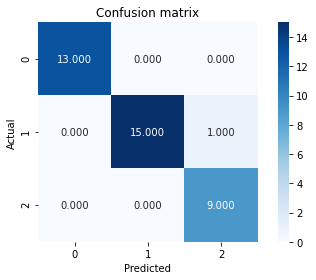

In [22]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [23]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.9736842105263158
0.02631578947368418
[1.  1.  0.9]
[1.     0.9375 1.    ]
[1.         0.96774194 0.94736842]


In [24]:
# CLASSIFIER: Kernel SVM
# Initialize kernel SVM classifier
classifier = SVC(kernel = 'poly') 
classifier.fit(x_train, y_train)

SVC(kernel='poly')

In [25]:
# Analyze complexity of kernel SVM classifier
len(classifier.support_vectors_)/len(x_train)

0.4732142857142857

In [ ]:
# Predict class labels using kernel SVM classifier
y_pred = classifier.predict(x_test)

In [ ]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score